In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, Output, fixed, interact_manual
from IPython.display import display, clear_output
import numpy as np
import math
from bokeh.plotting import figure, output_file, show 
from matplotlib.widgets import Slider, Button

In [126]:
x = np.arange(30000)
print(x)

[    0     1     2 ... 29997 29998 29999]


In [127]:
y = np.arange(30000)
print(y)

[    0     1     2 ... 29997 29998 29999]


<IPython.core.display.Javascript object>


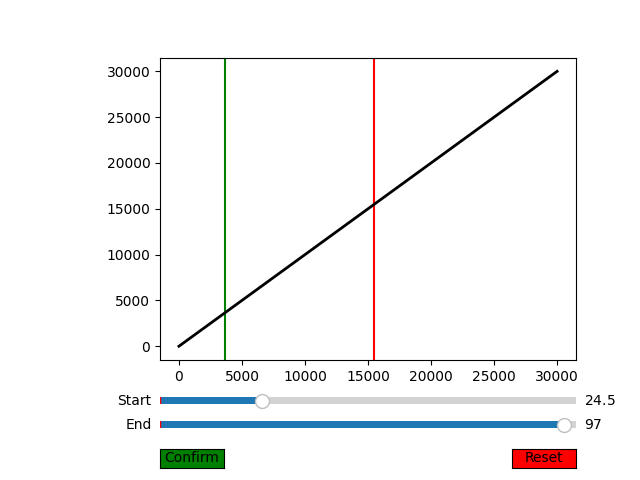

In [131]:
%matplotlib notebook
from numpy import pi, sin
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

def highlight(start, end):
    start = start/2
    end = 100 - end/2
    return start, end

axis_color = 'lightgoldenrodyellow'

fig = plt.figure()
ax = fig.add_subplot(111)

fig.subplots_adjust(left=0.25, bottom=0.25)

[line] = ax.plot(x, y, linewidth=2, color='black')



start_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
start_slider = Slider(start_slider_ax, 'Start', 0, 100, valinit=0)

end_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
end_slider = Slider(end_slider_ax, 'End', 0, 100, valinit=0)

#highlightplot = ax.axvspan(start_slider.val/2, 100 - end_slider.val/2, color='green', alpha=0.5)
highlightplotstart = ax.axvline(0, color='green', zorder=-1)
highlightplotend = ax.axvline(len(x), color='red', zorder=-1)

#line, = ax.plot(0, linewidth=2, color='green')

def sliders_on_changedstart(val):
    ax.cla()
    [line] = ax.plot(x, y, linewidth=2, color='black')
    highlightplotstart = ax.axvline((start_slider.val/2)*len(x)/100, color='green', zorder=-1)
    highlightplotend = ax.axvline(len(x) - (end_slider.val/2)*len(x)/100, color='red', zorder=-1)
    fig.canvas.draw_idle()
    
def sliders_on_changedend(val):
    ax.cla()
    [line] = ax.plot(x, y, linewidth=2, color='black')
    highlightplotstart = ax.axvline((start_slider.val/2)*len(x)/100, color='green', zorder=-1)
    highlightplotend = ax.axvline(len(x) - (end_slider.val/2)*len(x)/100, color='red', zorder=-1)
    fig.canvas.draw_idle()


start_slider.on_changed(sliders_on_changedstart)
end_slider.on_changed(sliders_on_changedend)

reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset', color='red', hovercolor='0.975')

confirm_button_ax = fig.add_axes([0.25, 0.025, 0.1, 0.04])
confirm_button = Button(confirm_button_ax, 'Confirm', color='green', hovercolor='0.975')
def reset_button_on_clicked(mouse_event):
    start_slider.reset()
    end_slider.reset()
    
def confirm_button_on_clicked(mouse_event):
    ax.cla()
    [line] = ax.plot(x, y, linewidth=2, color='black')
    highlightplotstart = ax.axvline(start_slider.val/2, color='green', zorder=-1)
    highlightplotend = ax.axvline(100 - end_slider.val/2, color='red', zorder=-1)

reset_button.on_clicked(reset_button_on_clicked)
confirm_button.on_clicked(confirm_button_on_clicked)

plt.show()

In [82]:
print(start_slider.val)
#in plotting loop have a dataframe that store stand and end vals of each plot

11.99669471153846


<IPython.core.display.Javascript object>


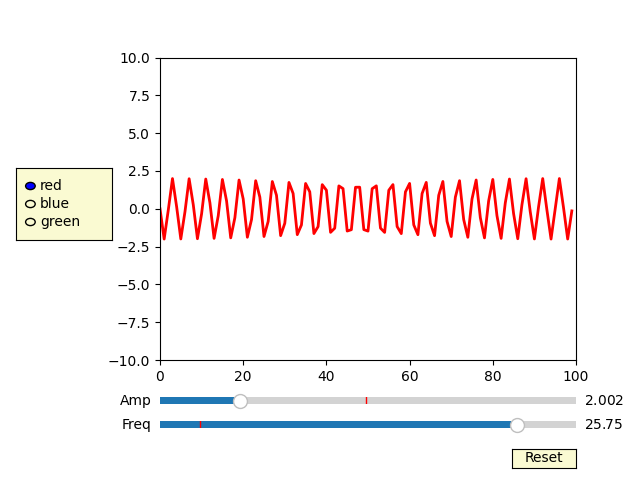

In [31]:
%matplotlib notebook
from numpy import pi, sin
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

def signal(amp, freq):
    return amp * sin(2 * pi * freq * t)

axis_color = 'lightgoldenrodyellow'

fig = plt.figure()
ax = fig.add_subplot(111)

# Adjust the subplots region to leave some space for the sliders and buttons
fig.subplots_adjust(left=0.25, bottom=0.25)

t = x
amp_0 = 5
freq_0 = 3

# Draw the initial plot
# The 'line' variable is used for modifying the line later
[line] = ax.plot(t, signal(amp_0, freq_0), linewidth=2, color='red')
ax.set_xlim([0, 100])
ax.set_ylim([-10, 10])

# Add two sliders for tweaking the parameters

# Define an axes area and draw a slider in it
amp_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
amp_slider = Slider(amp_slider_ax, 'Amp', 0.1, 10.0, valinit=amp_0)

# Draw another slider
freq_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
freq_slider = Slider(freq_slider_ax, 'Freq', 0.1, 30.0, valinit=freq_0)

# Define an action for modifying the line when any slider's value changes
def sliders_on_changed(val):
    line.set_ydata(signal(amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()
amp_slider.on_changed(sliders_on_changed)
freq_slider.on_changed(sliders_on_changed)

# Add a button for resetting the parameters
reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
def reset_button_on_clicked(mouse_event):
    freq_slider.reset()
    amp_slider.reset()
reset_button.on_clicked(reset_button_on_clicked)

# Add a set of radio buttons for changing color
color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
def color_radios_on_clicked(label):
    line.set_color(label)
    fig.canvas.draw_idle()
color_radios.on_clicked(color_radios_on_clicked)

plt.show()